<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    Sum = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        Sum += np.dot(matrix, vector)
    return Sum
    
X = [np.array([[1, 2], [3, 4]]), np.array([[2, 6], [7, 12]])]
V = [np.array([[1], [2]]), np.array([[5], [7]])]
print(sum_prod(X,V))

[[ 57]
 [130]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
def binarize(M, threshold=0.5):
    size = M.shape
    for i in range(size[0]):
        for j in range(size[1]):
            M[i][j] = 1 if M[i][j] > threshold else 0
    return M
print(binarize(np.array([[1,2,3],[2,0.3,0.7],[3,4,1]])))
print()
print(binarize(np.array([[1,0.1,3],[0.2,3,4],[3,0.3,5]]), 2))

[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]

[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]
    
mat1 = np.array([[1, 2, 2], [3, 3, 4], [2, 5, 4]])
print("ряды")
print(unique_rows(mat1))
print("стлбы")
print(unique_columns(mat1))
print()
mat2 = np.array([[2, 2, 6], [3, 2, 6], [2, 5, 4]])
print("ряды")
print(unique_rows(mat2))
print("стлбы")
print(unique_columns(mat2))

ряды
[array([1, 2]), array([3, 4]), array([2, 4, 5])]
стлбы
[array([1, 2, 3]), array([2, 3, 5]), array([2, 4])]

ряды
[array([2, 6]), array([2, 3, 6]), array([2, 4, 5])]
стлбы
[array([2, 3]), array([2, 5]), array([4, 6])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матрица:
[[ 1.20682384  1.10772022  0.31315999  1.10683343  0.86568168]
 [ 0.44633992  0.93631799  1.35938473  0.14086134  0.98135039]
 [ 0.6501528   1.34814139  0.59331391 -0.99485613  0.35986346]
 [-0.18760916  0.88386675  1.30134201 -0.18871034  0.91327041]]

Статистики по столбцам:
Столбец 1: Среднее = 0.5289, Дисперсия = 0.2486
Столбец 2: Среднее = 1.0690, Дисперсия = 0.0328
Столбец 3: Среднее = 0.8918, Дисперсия = 0.2026
Столбец 4: Среднее = 0.0160, Дисперсия = 0.5673
Столбец 5: Среднее = 0.7800, Дисперсия = 0.0605

Статистики по строкам:
Строка 1: Среднее = 0.9200, Дисперсия = 0.1047
Строка 2: Среднее = 0.7729, Дисперсия = 0.1840
Строка 3: Среднее = 0.3913, Дисперсия = 0.5892
Строка 4: Среднее = 0.5444, Дисперсия = 0.3795


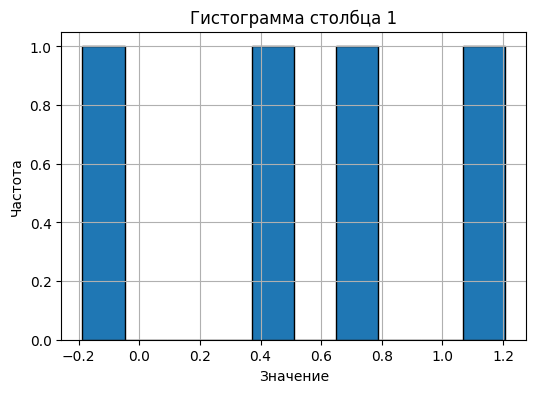

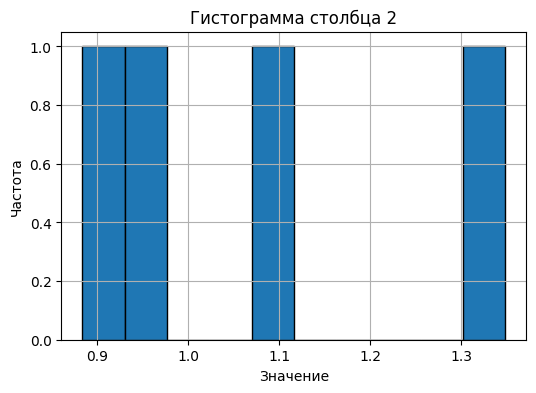

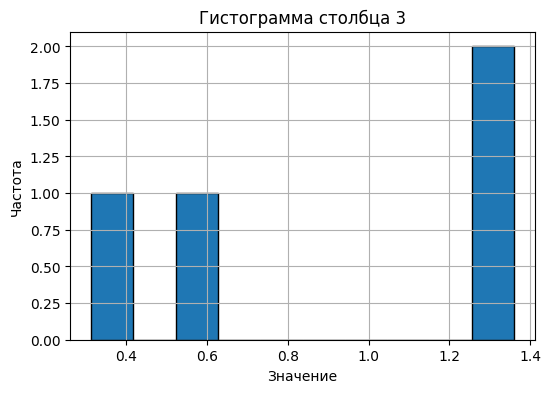

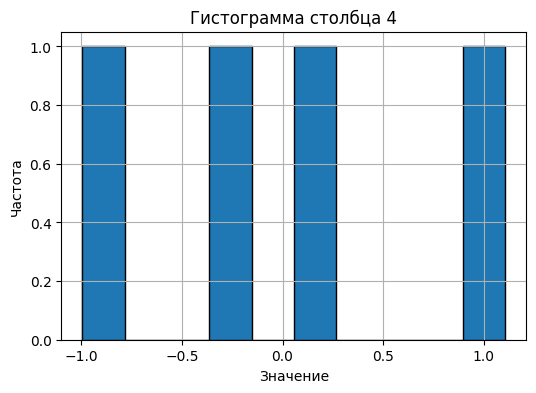

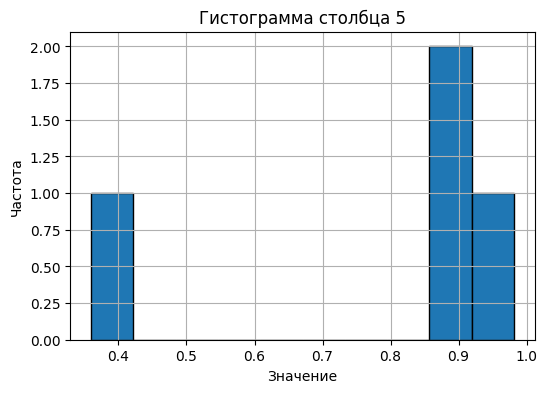

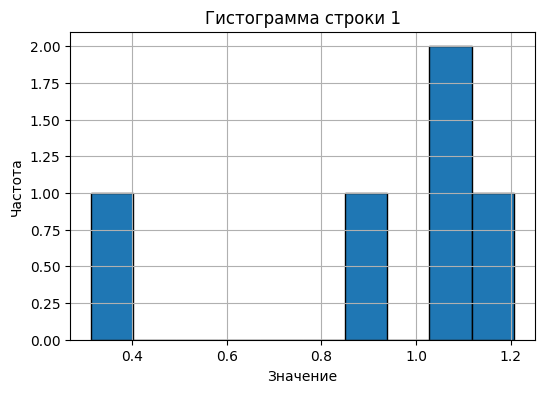

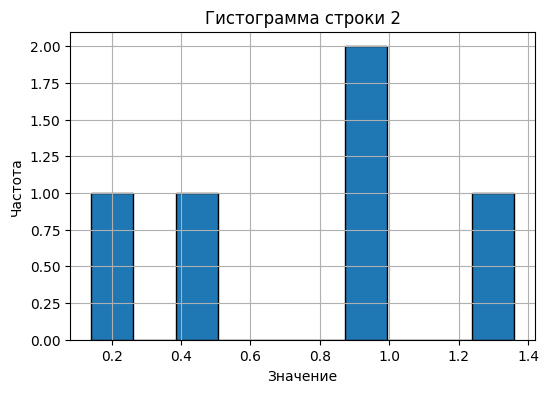

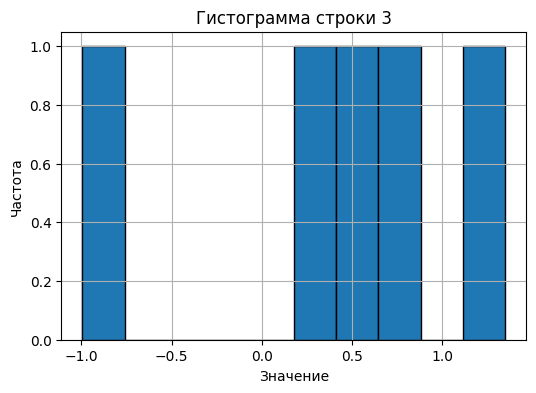

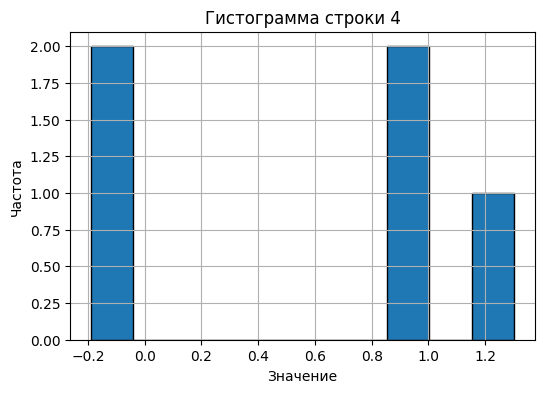

In [7]:
def analyze_matrix(n, m):
    matrix = np.random.randn(n, m)
    print("Матрица:")
    print(matrix)

    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    print("\nСтатистики по столбцам:")
    for i in range(m):
        print(f"Столбец {i+1}: Среднее = {col_means[i]:.4f}, Дисперсия = {col_vars[i]:.4f}")

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    print("\nСтатистики по строкам:")
    for i in range(n):
        print(f"Строка {i+1}: Среднее = {row_means[i]:.4f}, Дисперсия = {row_vars[i]:.4f}")

    for i in range(m):
        plt.figure(figsize=(6,4))
        plt.hist(matrix[:, i], bins=10, edgecolor='black')
        plt.title(f'Гистограмма столбца {i+1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    for i in range(n):
        plt.figure(figsize=(6,4))
        plt.hist(matrix[i, :], bins=10, edgecolor='black')
        plt.title(f'Гистограмма строки {i+1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
analyze_matrix(4, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
def chess(m, n, a, b):
    matrix = []
    for i in range(m):
        row = []
        for j in range(n):
            if (i + j) % 2 == 0:
                row.append(a)
            else:
                row.append(b)
        matrix.append(row)
    return matrix

#Тест
m, n = 4, 5
a, b = 1, 0
checkerboard = chess(m, n, a, b)
for row in checkerboard:
    print(row)

[1, 0, 1, 0, 1]
[0, 1, 0, 1, 0]
[1, 0, 1, 0, 1]
[0, 1, 0, 1, 0]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

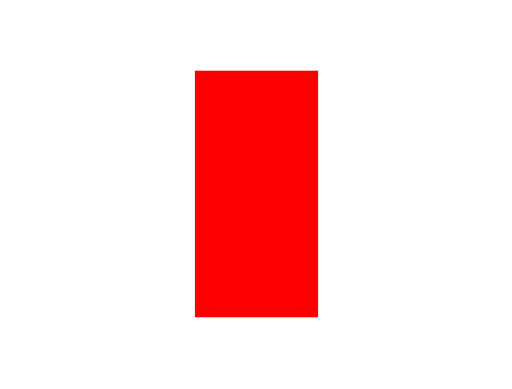

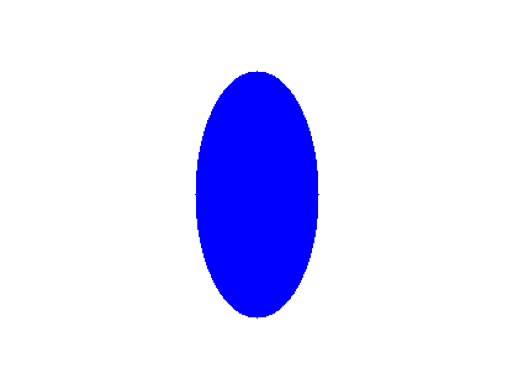

In [10]:
def draw_rectangle(m, n, a, b, bg_color, rect_color):
    image = np.zeros((n, m, 3), dtype=np.uint8)
    image[:] = bg_color
    top_left_x = (m - a) // 2
    top_left_y = (n - b) // 2
    image[top_left_y:top_left_y + b, top_left_x:top_left_x + a] = rect_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(m, n, a, b, bg_color, ellipse_color):
    Y, X = np.ogrid[:n, :m]
    center_x = m / 2
    center_y = n / 2
    mask = (((X - center_x) / (a / 2))**2 + ((Y - center_y) / (b / 2))**2) <= 1
    image = np.zeros((n, m, 3), dtype=np.uint8)
    image[:] = bg_color
    image[mask] = ellipse_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Пример использования
if __name__ == "__main__":
    m, n = 400, 300
    a, b = 100, 200
    bg_color = [255, 255, 255]      # Белый фон
    rect_color = [255, 0, 0]        # Красный прямоугольник
    ellipse_color = [0, 0, 255]     # Синий овал

    draw_rectangle(m, n, a, b, bg_color, rect_color)
    draw_ellipse(m, n, a, b, bg_color, ellipse_color)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [11]:
def analyze_time_series(series, p):
    series = np.array(series)
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    maxima = []
    minima = []
    for i in range(1, len(series)-1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            minima.append(i)
    
    moving_average = np.convolve(series, np.ones(p)/p, mode='valid')
    return mean, variance, std_dev, maxima, minima, moving_average

# Тест
if __name__ == "__main__":
    time_series = [1, 3, 2, 5, 7, 6, 4, 8, 9, 7, 5, 6, 4, 3, 2, 4, 5]
    window_size = 3
    mean, variance, std_dev, maxima, minima, moving_avg = analyze_time_series(time_series, window_size)
    
    print(f"Математическое ожидание: {mean}")
    print(f"Дисперсия: {variance}")
    print(f"СКО: {std_dev}")
    print(f"Локальные максимумы: {maxima}")
    print(f"Локальные минимумы: {minima}")
    print(f"Скользящее среднее: {moving_avg}")

Математическое ожидание: 4.764705882352941
Дисперсия: 4.650519031141869
СКО: 2.1565062093909835
Локальные максимумы: [1, 4, 8, 11]
Локальные минимумы: [2, 6, 10, 14]
Скользящее среднее: [2.         3.33333333 4.66666667 6.         5.66666667 6.
 7.         8.         7.         6.         5.         4.33333333
 3.         3.         3.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [12]:
def one_hot_encode(labels):
    n_classes = max(labels) + 1
    one_hot = []
    for label in labels:
        encoding = [0] * n_classes
        encoding[label] = 1
        one_hot.append(encoding)
    return one_hot

# Тест
vector = [0, 2, 3, 0]
encoded = one_hot_encode(vector)
for row in encoded:
    print(row)

[1, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
